In [1]:
#packages we need
using DifferentialEquations
using Plots 
using CSV
using Distributions
using Random
using DataFrames
using JLD2
using DelimitedFiles
using FileIO

In [2]:
first_cell = 1
last_cell = 1000

1000

In [3]:
### Get plot times split into normal and quiescent cells NEW

function getCCtimes_nq(mut_folder, q)
    CC_times_df = DataFrame(G1S=Int64[], SG2=Int64[], G2M=Int64[], M=Int64[], Cell=Int64[], State=String[], Plotn=Int64[], Plotq=Int64[])

    for i in first_cell:last_cell
        if isfile("outputFiles_cell_cycle/"*mut_folder*"/plot_times/plot_times_"*string(i)*".csv") == true
            plot_times = DataFrame(CSV.File("outputFiles_cell_cycle/"*mut_folder*"/plot_times/plot_times_"*string(i)*".csv", header=true))
            plot_times[!, :Cell] = [i]
            plot_times[!, :State] = ["n"]
            plot_times[!, :Plotn] = plot_times[!, :M]
            plot_times[!, :Plotq] = [0]                    
            append!(CC_times_df, plot_times)
        elseif isfile("outputFiles_cell_cycle/"*mut_folder*"/quiescent/sol_df"*string(i)*".csv") == true
            plot_times = DataFrame(G1S=1, SG2=2, G2M=3, M=q)
            plot_times[!, :Cell] = [i]
            plot_times[!, :State] = ["q"]
            plot_times[!, :Plotn] = [0]
            plot_times[!, :Plotq] = plot_times[!, :M]
            append!(CC_times_df, plot_times)
        else
            continue
        end
    end
    return(CC_times_df)
end

getCCtimes_nq (generic function with 1 method)

In [4]:
CC_times_WT = getCCtimes_nq("WT", 4000)

,G1S,SG2,G2M,M,Cell,State,Plotn,Plotq
,Int64,Int64,Int64,Int64,Int64,String,Int64,Int64
1,621,896,1004,1048,1,n,1048,0
2,365,653,765,824,2,n,824,0
3,711,997,1095,1136,3,n,1136,0
4,207,492,601,645,4,n,645,0
5,425,711,816,858,5,n,858,0
6,436,719,815,855,6,n,855,0
7,357,623,728,767,7,n,767,0
8,234,527,633,677,8,n,677,0
9,487,791,891,935,9,n,935,0


In [5]:
CC_times_myc_mut = getCCtimes_nq("myc_mut", 4000)
CC_times_myc_del = getCCtimes_nq("myc_del", 4000)
CC_times_CycA_exp = getCCtimes_nq("CycA_exp", 4000);
CC_times_myc_mut_CycA_exp = getCCtimes_nq("myc_mut_CycA_exp", 4000);

In [4]:
CC_times_myc_x20_CycA_exp = getCCtimes_nq("myc_x20_CycA_exp", 4000)

,G1S,SG2,G2M,M,Cell,State,Plotn,Plotq
,Int64,Int64,Int64,Int64,Int64,String,Int64,Int64
1,214,496,598,641,1,n,641,0
2,279,561,649,693,2,n,693,0
3,326,616,710,753,3,n,753,0
4,211,495,590,633,4,n,633,0
5,146,434,530,572,5,n,572,0
6,160,460,561,606,6,n,606,0
7,225,522,618,665,7,n,665,0
8,270,533,620,658,8,n,658,0
9,927,1199,1298,1345,9,n,1345,0


In [5]:
function mergeCCtimes(CC_times_df, mut)
    CC_times_df_M = CC_times_df[!, [4,5,7,8]]
    rename!(CC_times_df_M, :M => mut)
    CC_times_WT_mut = innerjoin(CC_times_WT_M, CC_times_df_M, on = :Cell)
    sort!(CC_times_WT_mut, [:WT], rev=true)
    return(CC_times_WT_mut)
end

mergeCCtimes (generic function with 1 method)

In [8]:
## to understand what's happening to those cells from myc mut x1.5 that are much shorter than expected 
## we need to subset WT and mut results for those cells 
CC_times_WT_M = CC_times_WT[!, [4,5,7,8]]
rename!(CC_times_WT_M, :M => :WT)
rename!(CC_times_WT_M, :Plotn => :Plotn_WT)
rename!(CC_times_WT_M, :Plotq => :Plotq_WT);

In [9]:
CC_times_WT_myc_x20_CycA_exp = mergeCCtimes(CC_times_myc_x20_CycA_exp, "myc_x20_CycA_exp")

,WT,Cell,Plotn_WT,Plotq_WT,myc_x20_CycA_exp,Plotn,Plotq
,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,3058,12,0,3058,576,576,0
2,3058,21,0,3058,695,695,0
3,3058,31,0,3058,691,691,0
4,3058,42,0,3058,645,645,0
5,3058,95,0,3058,1015,1015,0
6,3058,120,0,3058,652,652,0
7,3058,130,0,3058,574,574,0
8,3058,131,0,3058,602,602,0
9,3058,159,0,3058,719,719,0


### Load cell cycle times dfs

In [7]:
CC_times_WT = DataFrame(CSV.File("CC_times_WT.csv"));

In [5]:
## orig
CC_times_WT = DataFrame(CSV.File("CC_times_WT.csv"))
CC_times_myc_mut = DataFrame(CSV.File("CC_times_myc_mut.csv"))
CC_times_myc_p27_mut = DataFrame(CSV.File("CC_times_myc_p27_mut.csv"))
CC_times_CycE_exp = DataFrame(CSV.File("CC_times_CycE_exp.csv"))
CC_times_Cdc20_exp = DataFrame(CSV.File("CC_times_Cdc20_exp.csv"))
CC_times_CycD_exp = DataFrame(CSV.File("CC_times_CycD_exp.csv"))
CC_times_CycA_exp = DataFrame(CSV.File("CC_times_CycA_exp.csv"))
CC_times_myc_del = DataFrame(CSV.File("CC_times_myc_del.csv"));

In [6]:
## merged
CC_times_WT_myc_mut = DataFrame(CSV.File("CC_times_WT_myc_mut.csv"))
CC_times_WT_myc_p27_mut = DataFrame(CSV.File("CC_times_WT_myc_p27_mut.csv"))
CC_times_WT_CycE_exp = DataFrame(CSV.File("CC_times_WT_CycE_exp.csv"))
CC_times_WT_Cdc20_exp = DataFrame(CSV.File("CC_times_WT_Cdc20_exp.csv"))
CC_times_WT_CycD_exp = DataFrame(CSV.File("CC_times_WT_CycD_exp.csv"))
CC_times_WT_CycA_exp = DataFrame(CSV.File("CC_times_WT_CycA_exp.csv"))
CC_times_WT_myc_del = DataFrame(CSV.File("CC_times_WT_myc_del.csv"));

### Grid plot

In [10]:
using StatsPlots

In [11]:
pyplot()

Plots.PyPlotBackend()

In [12]:
function plotGrid(CC_times_comb, CC_times_mut, l1, l2, WT_col, mut_col, mut)

        ## select WT results    
        sort!(CC_times_comb, [:Plotn_WT], rev=true)
        CC_times_comb[!, :id] = collect(1:nrow(CC_times_comb))
    
        CC_times_WTn = CC_times_comb[(CC_times_comb.Plotn_WT .!= 0), :];
    
        CC_times_WT_q=CC_times_comb[(CC_times_comb.Plotq_WT .!= 0), :];
            
        ## select mut results
        CC_times_Mn = CC_times_comb[(CC_times_comb.Plotn .!= 0), :];
    
        CC_times_Mq=CC_times_comb[(CC_times_comb.Plotq .!= 0), :];

        ## bar plot 1
        plotb1=plot(ylim = (-10,1000))

        for row in eachrow(CC_times_Mn)
            plot!(plotb1,[0,row[mut]],[row["id"],row["id"]],color=mut_col,legend = false,lw=0.5)
        end    
        vline!([730], color=:grey, linestyle=:dash, lw=1, label="M WT 730 mins")
        plot!(CC_times_WTn[!, :Plotn_WT],CC_times_WTn[!, :id], color=WT_col, label=l1,lw=2)
        s=string.(collect(0:5:55))
        plot!(xticks = (0:(60*5):(60*55),s),xlabel="time (hours)",ylabel="cell number",fmt = :png)

    
        ## bar plot 2
        plotb2=plot(yaxis=false,ylim = (-10,1000),xticks=false)
        for row in eachrow(CC_times_WT_q)
            plot!(plotb2,[0,row["Plotq_WT"]],[row["id"],row["id"]],color=WT_col,legend = false)
        end

    
        ## bar plot 3
        plotb3=plot(yaxis=false,ylim = (-10,1000),xticks=false)
        for row in eachrow(CC_times_Mq)
            plot!(plotb3,[0,row["Plotq"]],[row["id"],row["id"]],color=mut_col,legend = false)
        end
        
        ## density
        plotd = density(CC_times_WTn[!, :Plotn_WT], label = l1, alpha=0.5, color=WT_col)
                density!(CC_times_Mn[!, :Plotn], label = l2, alpha=0.5, color=mut_col)
                s=string.(collect(0:5:55))
                plot!(xticks = (0:(60*5):(60*55),s),xlabel="time (hours)",ylabel="density",fmt = :png)
    
        ## bar plot 4
        q_res1 = [nrow(CC_times_comb[(CC_times_comb.Plotq_WT .!= 0), :]),0]
        q_res2 = [0, nrow(CC_times_comb[(CC_times_comb.Plotq .!= 0), :])]
        #qres = 
        plotb4 = bar(q_res1,
                    color=WT_col,
                    bar_width=0.5,
                    label=false,
                    ylim = (0,200),
                    xticks=(1:length([l1,l2]),[l1,l2]),
                    linecolor = :match
                    )
                 bar!(q_res2, color=mut_col, label=false, bar_width=0.5,linecolor = :match)
    
        l = @layout [
        a{0.5h,0.6w} b{0.5h,0.01w} c{0.5h,0.01w}
        d{0.4h,0.62w} e{0.4h,0.1w}]
    
        plot_comb = plot(plotb1, plotb2, plotb3, plotd, plotb4, 
                    layout=l, size=(1000,1500))
        return(plot_comb, plotb1, plotb2, plotd, plotb4)
end

plotGrid (generic function with 1 method)

In [17]:
plots_WT_myc = plotGrid(CC_times_WT_myc_mut, CC_times_myc_mut, "WT", "Myc x1.5", :black, :green, "myc_mut")

(Plot{Plots.PyPlotBackend() n=1079}, Plot{Plots.PyPlotBackend() n=979}, Plot{Plots.PyPlotBackend() n=81}, Plot{Plots.PyPlotBackend() n=2}, Plot{Plots.PyPlotBackend() n=2})

In [14]:
plots_Myc20_CycA = plotGrid(CC_times_WT_myc_x20_CycA_exp, CC_times_myc_x20_CycA_exp, "WT", "Myc x20 CycA exp x 1.5", :black, :green, "myc_x20_CycA_exp")

(Plot{Plots.PyPlotBackend() n=1072}, Plot{Plots.PyPlotBackend() n=966}, Plot{Plots.PyPlotBackend() n=81}, Plot{Plots.PyPlotBackend() n=2}, Plot{Plots.PyPlotBackend() n=2})

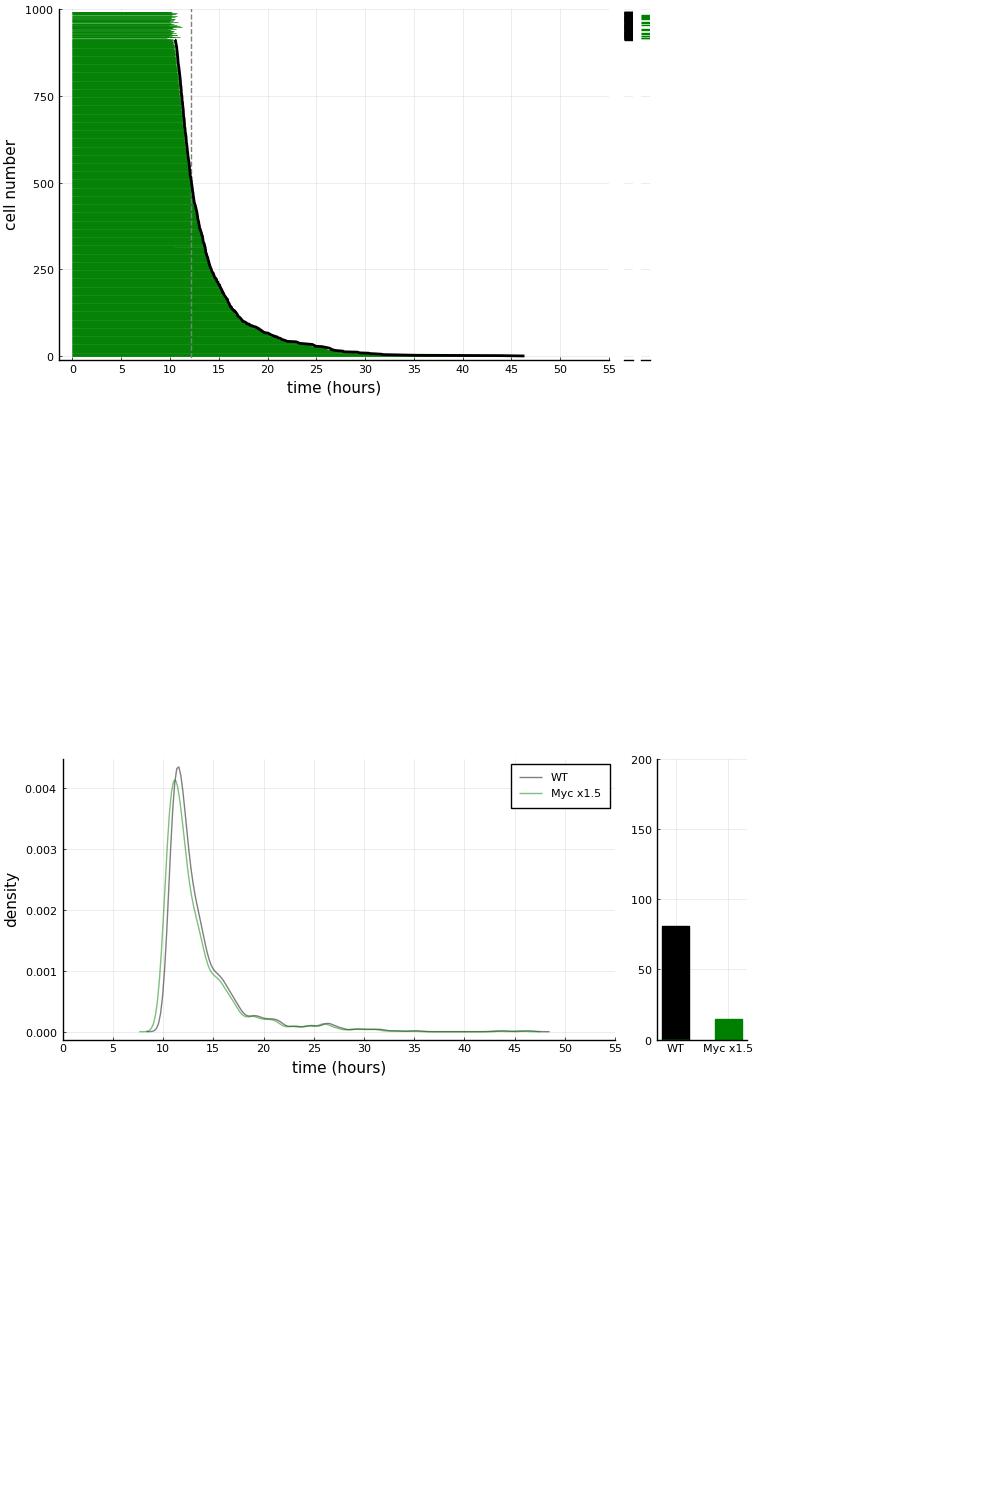

In [18]:
plots_WT_myc[1]

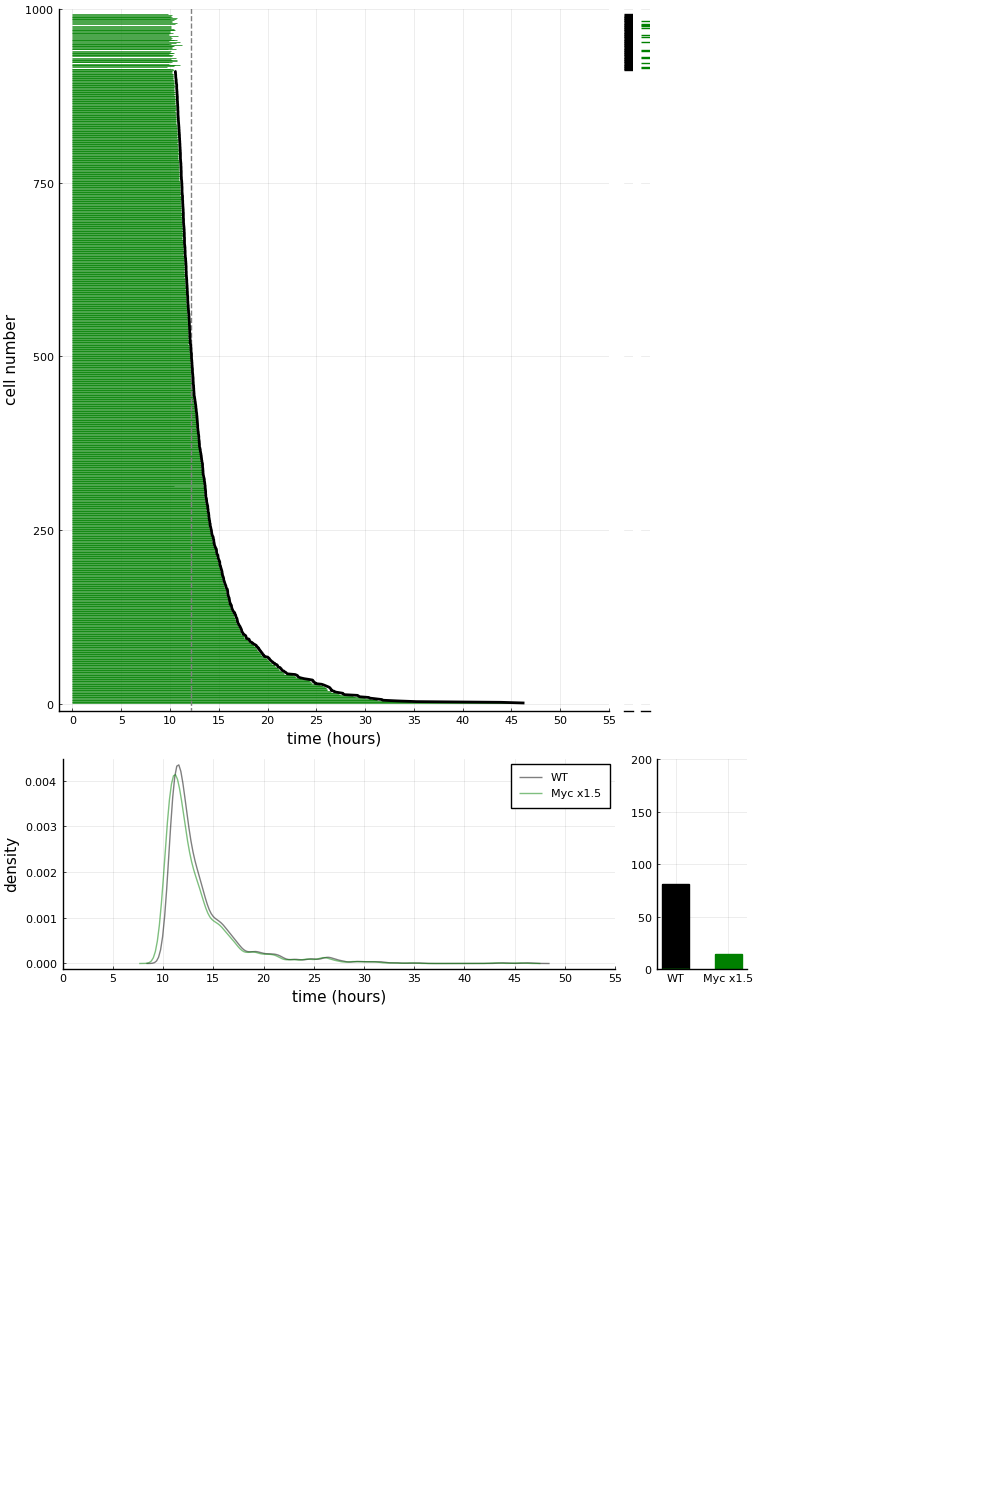

In [16]:
plotGrid(CC_times_WT_myc_mut, CC_times_myc_mut, "WT", "Myc x1.5", :black, :green, "myc_mut")

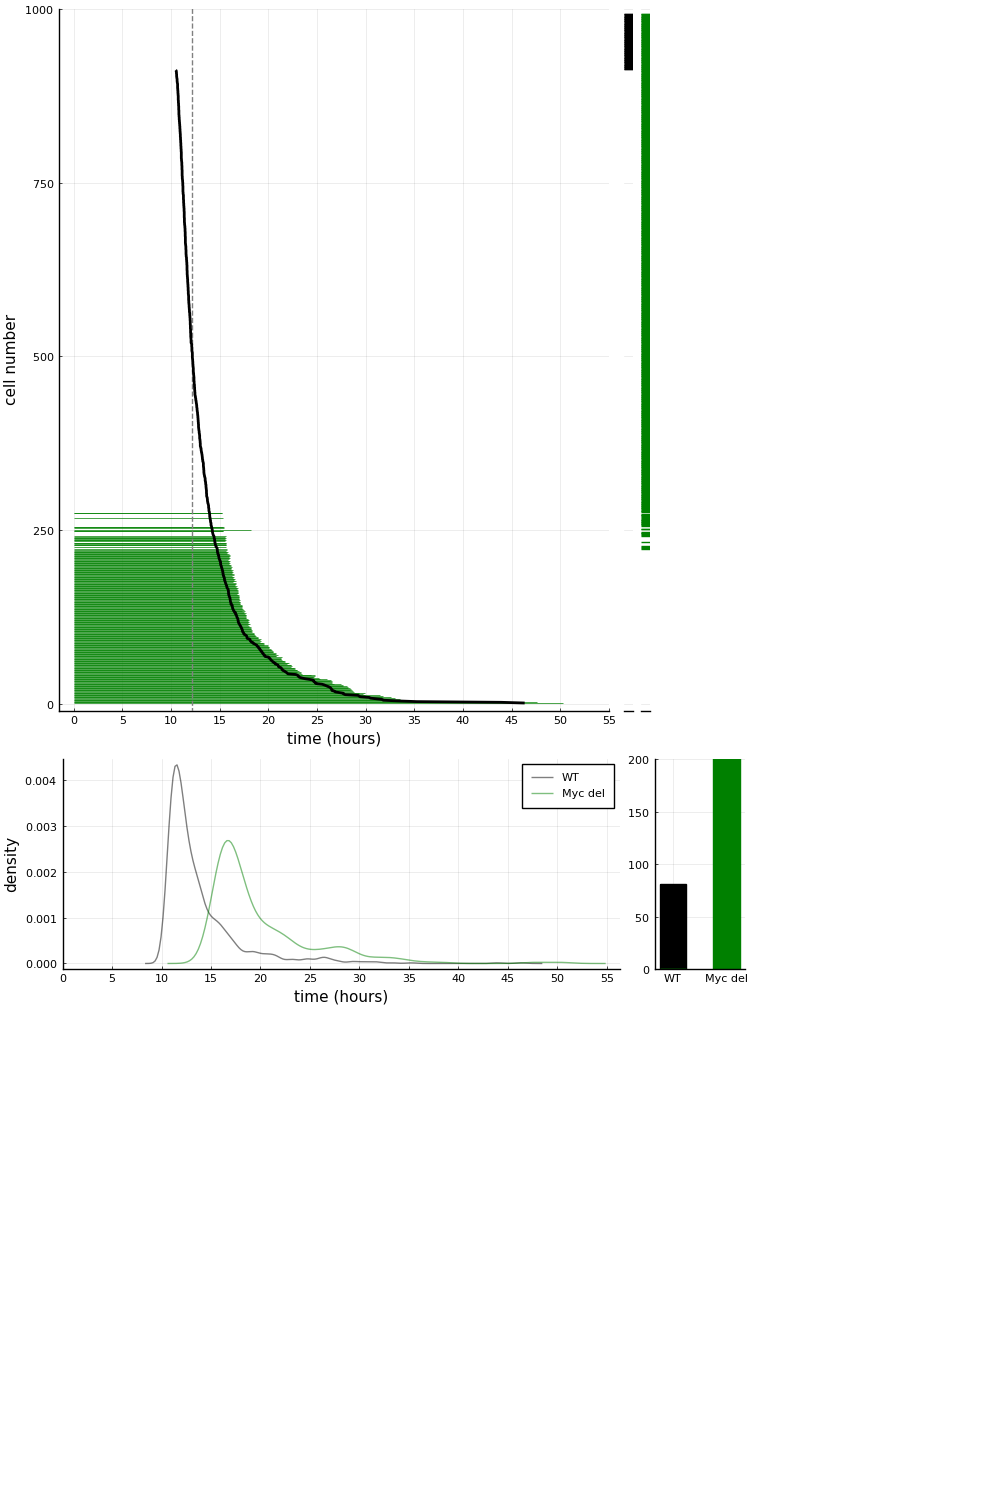

In [17]:
plotGrid(CC_times_WT_myc_del, CC_times_myc_del, "WT", "Myc del", :black, :green, "myc_del")

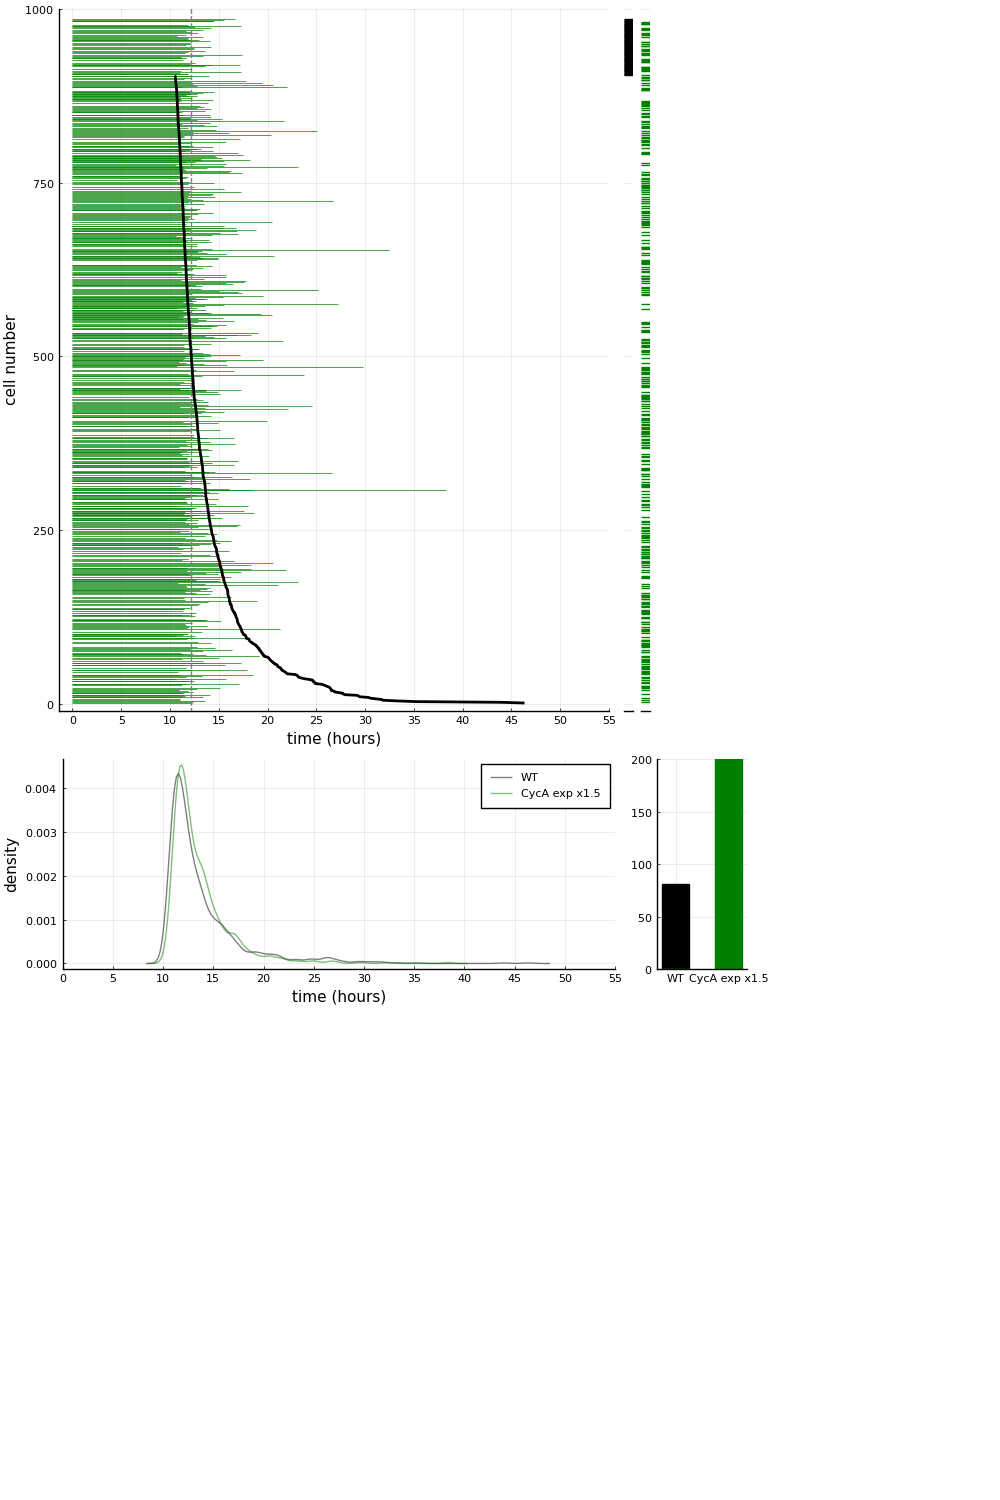

In [18]:
plotGrid(CC_times_WT_CycA_exp, CC_times_CycA_exp, "WT", "CycA exp x1.5", :black, :green, "CycA_exp")

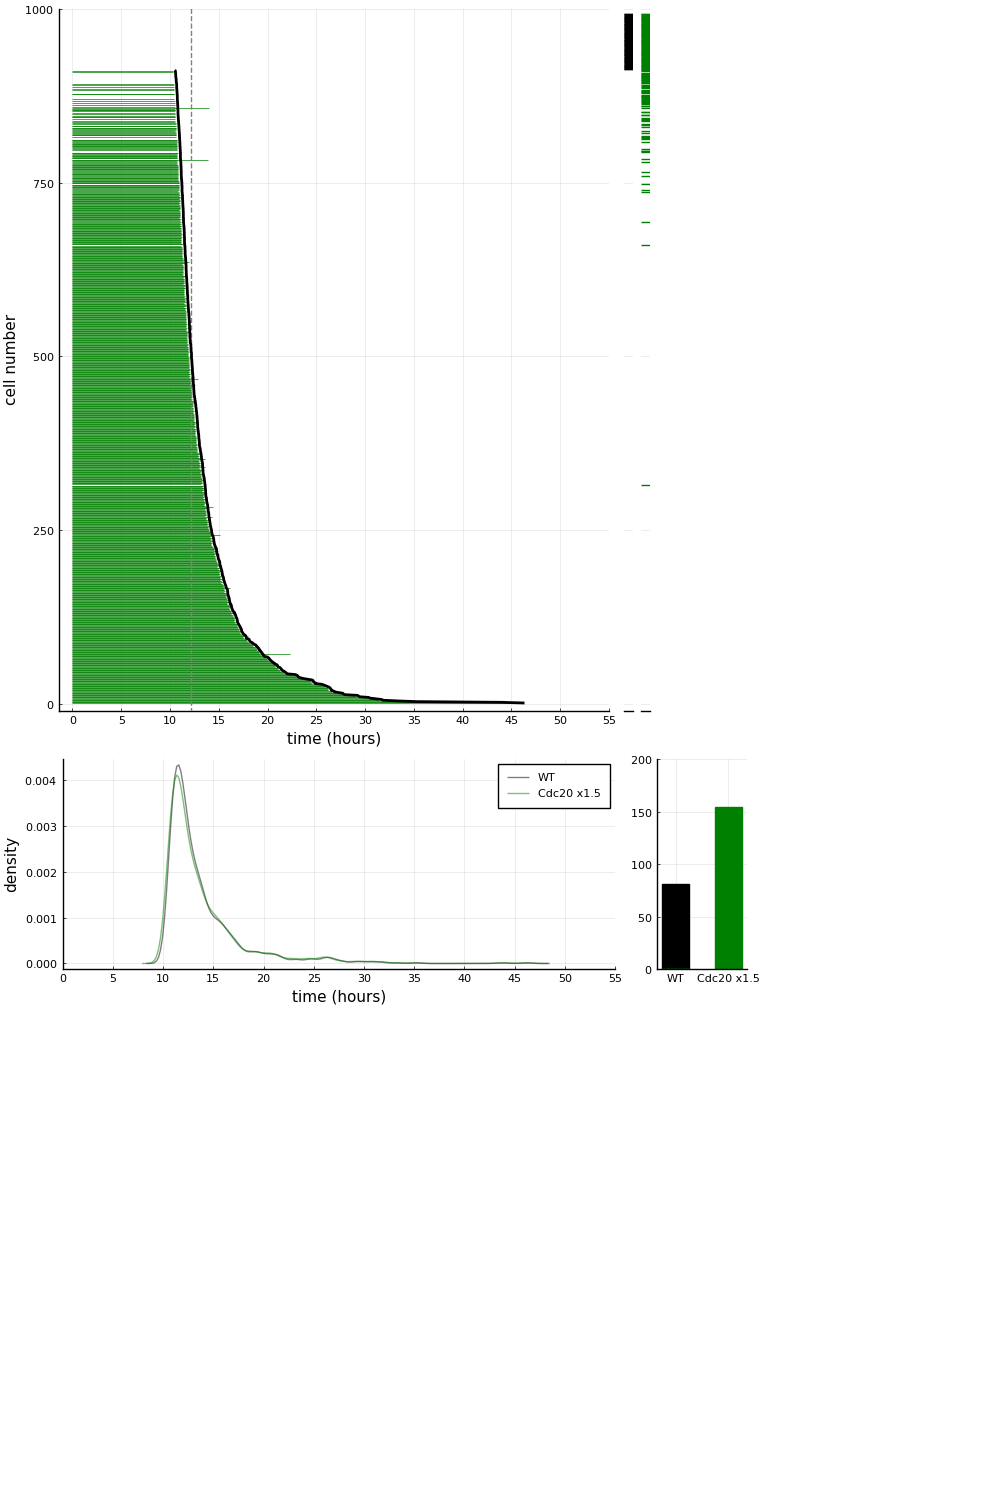

In [8]:
plotGrid(CC_times_WT_Cdc20_exp, CC_times_Cdc20_exp, "WT", "Cdc20 x1.5", :black, :green, "Cdc20_exp")

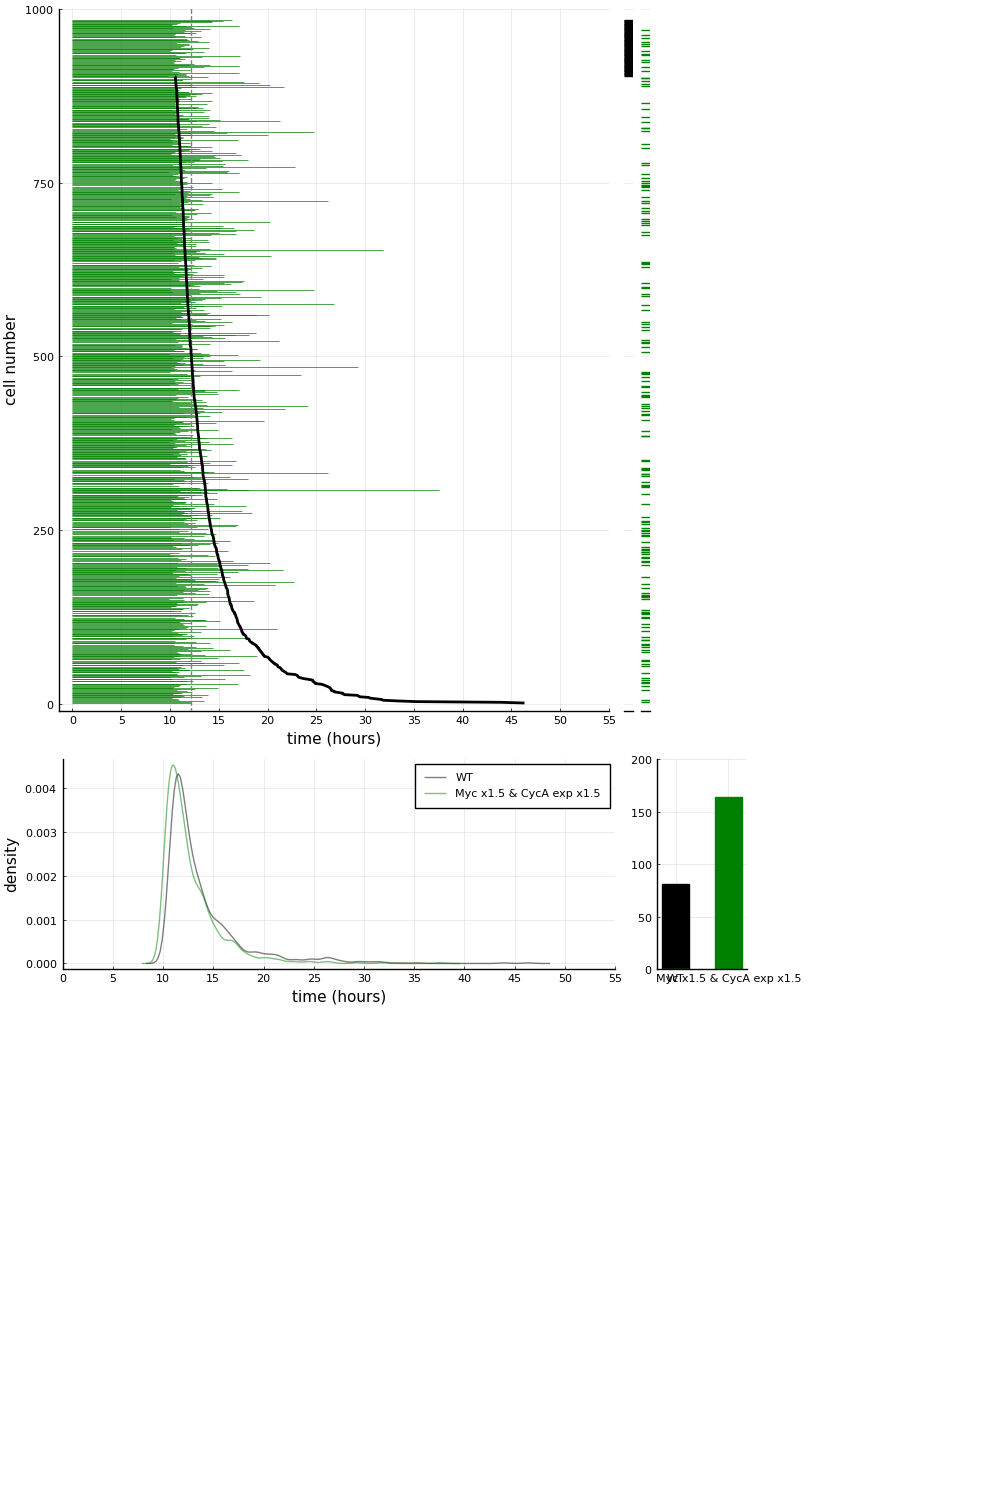

In [12]:
plotGrid(CC_times_WT_myc_mut_CycA_exp, CC_times_myc_mut_CycA_exp, "WT", "Myc x1.5 & CycA exp x1.5", :black, :green, "myc_mut_CycA_exp")

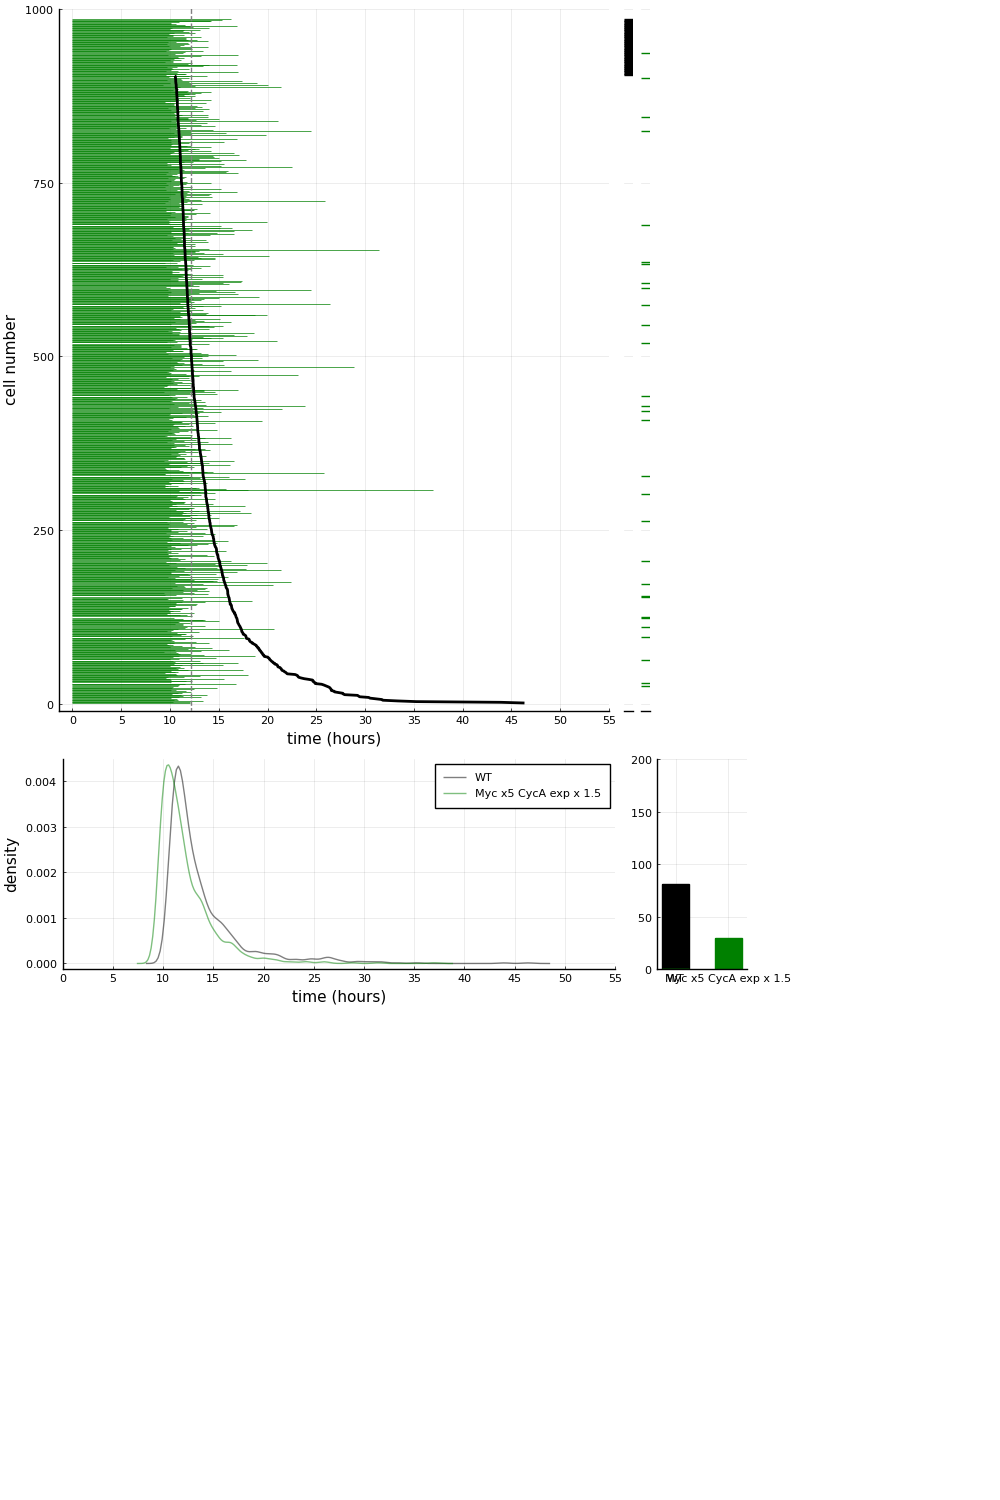

In [14]:
plotGrid(CC_times_WT_myc_x5_CycA_exp, CC_times_myc_x5_CycA_exp, "WT", "Myc x5 CycA exp x 1.5", :black, :green, "myc_x5_CycA_exp")

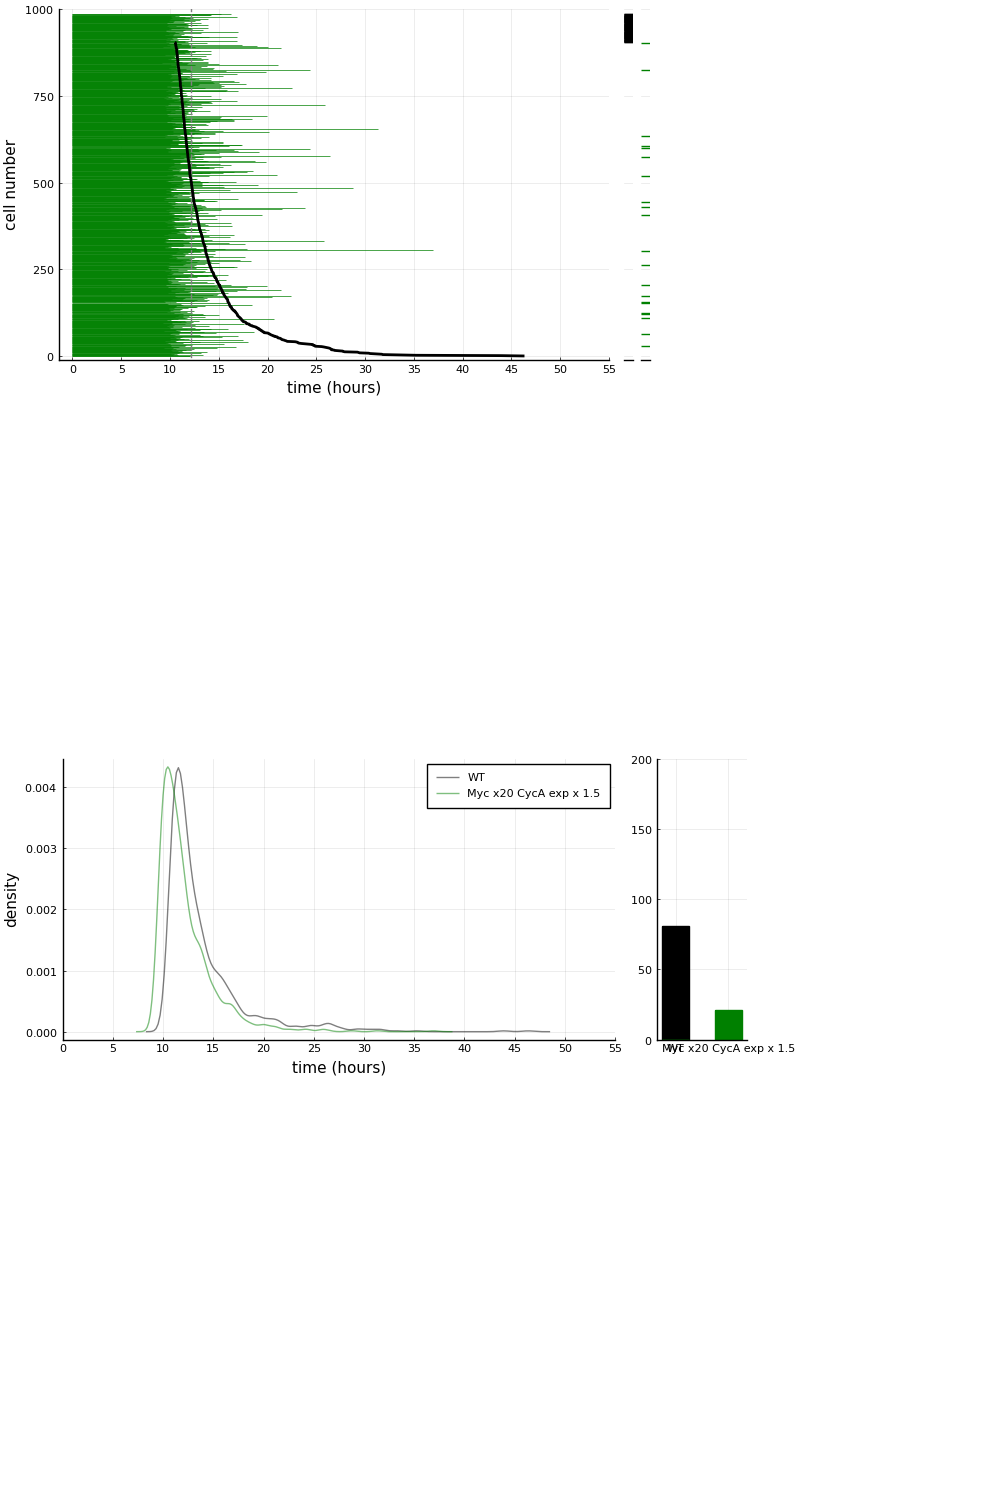

In [15]:
plots_Myc20_CycA[1]